<a href="https://colab.research.google.com/github/won-hj/deep-learning/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%9C_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2장

In [ ]:
# 예제 2.1 뉴런의 출력(텐서플로) 바이어스가 없는 경우
import tensorflow as t

#계단함수
def step_function(net):
  '''if net > T:
    return 1
  else:
    return 0'''
  return 0 if net < T else 1

#뉴런 정의
def neuron(x, w):
  net = t.reduce_sum(x*w) #입력 가중합
  return step_function(net)

T = 3 #임계치

# InvalidArgumentError: cannot compute Mul as input #1(zero-based) was expected to be a int32 tensor but is a float tensor [Op:Mul] name:
#x = t.constant([1, 2, 3]) # float tensor

x = t.constant([1., 2., 3.]) #int32 tensor
w = t.constant([0.1, 0.2, 0.3])

y = neuron(x, w)
print(f'net: {t.reduce_sum(x*w):.2f}')
print(f'y: {y}')

net: 1.40
y: 0


In [ ]:
# 예제 2.2 뉴런의 출력(파이토치) 바이어스가 있는 경우
import torch as t

#계단 함수 정의
def step_function(net):
  '''
  if net > T:
    return 1
  else:
    return 0
  '''
  return 1 if net >= T else 1

#뉴런 정의
def neuron(x, w, b):
  net = t.matmul(x, w) + 1
  #net = t.sum(x, w) + 1
  return step_function(net)

T = 3

x = t.tensor([1., 2., 3.])
w = t.tensor([0.1, 0.2, 0.3])

# @_handle_torch_function_and_wrap_type_error_to_not_implemented
#b = t.tensor([.1]) #TypeError: unsupported format string passed to Tensor.__format__
b = t.tensor(.1)

y = neuron(x, w, b)

'''
TypeError: sum() received an invalid combination of arguments - got (Tensor, Tensor), but expected one of:
 * (Tensor input, *, torch.dtype dtype = None)
 * (Tensor input, tuple of ints dim, bool keepdim = False, *, torch.dtype dtype = None, Tensor out = None)
 * (Tensor input, tuple of names dim, bool keepdim = False, *, torch.dtype dtype = None, Tensor out = None)
 '''
#print(f'net: {t.sum(x,w)+b:.2f}')

print(f'net: {t.sum(x*w)+b:.2f}')
print(f'y: [y]')

net: 1.50
y: [y]


In [ ]:
# 예제 2.3 선형 뉴런(파이썬) 가중치 초기화
import numpy as np
np.random.seed(7)

# 선형 뉴런 정의
def linear_neuron(w, x, b):
  net = np.sum(w*x)+b
  return net

#SyntaxError: invalid syntax
#x = np.array([1,. 2,. 3.])

x = np.array([1, 2, 3])
w = np.random.randn(3)
b = np.random.randn()

print(f'w: {w}')
print(f'b: {b}')
print(f'net: {linear_neuron(w, x, b):.2f}')


w: [ 1.6905257  -0.46593737  0.03282016]
b: 0.40751628299650783
net: 1.26


In [ ]:
# 예제 2.8 단층 신경망 학습(AND 연산)(파이썬)
import numpy as np
np.random.seed(77)

# 계단 함수
def step_function(net):
  return 1 if net >= T else 0

# 뉴런
def neuron(x, w, b):
  net = np.sum(x*w) + b
  return step_function(net)

# 임계치
T = 0

# 학습 데이터
x_train = np.array([[0,0], [0,1], [1,0], [1,1]])
y_train = np.array([[0], [0], [0], [1]])

# 가중치 초기화
w = np.random.randn(2) # 정규 분포(평균 0, 표준 편차 1)
b = np.random.randn(1)

print(f'initial weight: {w.round()}')
print(f'initial bias: {b.round()}')



initial weight: [0. 1.]
initial bias: [-1.]


In [ ]:
# 초기 가중치의 결과 확인

x_init_test = np.array([[0,0], [0,1], [1,0], [1,1]])
y_init_test = np.array([[0], [0], [0], [1]])

for i in range(4):
  initial_predict = neuron(x_init_test[i], w, b)
  print(f'x_init_test: {x_init_test[i]}, y_init_test: {y_init_test[i]}, initial predict: {initial_predict}')



x_init_test: [0 0], y_init_test: [0], initial predict: 0
x_init_test: [0 1], y_init_test: [0], initial predict: 1
x_init_test: [1 0], y_init_test: [0], initial predict: 0
x_init_test: [1 1], y_init_test: [1], initial predict: 1


In [ ]:
# 오차를 이용한 신경망 학습

epoch = 10
lr = 0.01

for i in range(epoch):
  loss  = 0
  for j in range(4):
    output = neuron(x_train[j], w, b) # 출력
    error = y_train[j] - output # 목표치 - 출력
    w += lr * w * x_train[j] # 가중치 업데이트
    b += lr * b # 바이어스 업데이트
    loss += error #오차율 업데이

  print(f'Epoch: {i+1} \t loss: {loss}')

print(f'final weight: {w.round(2)}')
print(f'final bias: {b.round(2)}')

Epoch: 1 	 loss: [-1]
Epoch: 2 	 loss: [-1]
Epoch: 3 	 loss: [-1]
Epoch: 4 	 loss: [-1]
Epoch: 5 	 loss: [-1]
Epoch: 6 	 loss: [-1]
Epoch: 7 	 loss: [-1]
Epoch: 8 	 loss: [0]
Epoch: 9 	 loss: [0]
Epoch: 10 	 loss: [0]
final weight: [0.27 0.81]
final bias: [-0.86]


In [ ]:
# 검증(예측)

x_test = np.array([[0,0], [0,1], [1,0], [1,1]])
y_test = np.array([[0], [0], [0], [1]])

for i in range(4):
  predict = neuron(x_test[i], w, b)
  print(f'x_test: {x_test[i]}, y_test: {y_test[i]}, predict: {predict}')


x_test: [0 0], y_test: [0], predict: 0
x_test: [0 1], y_test: [0], predict: 0
x_test: [1 0], y_test: [0], predict: 0
x_test: [1 1], y_test: [1], predict: 1


In [ ]:
# 예제 2.9 단극성 계단 함수
import numpy as np

def unipolar_step(net):
  return 1 if net >= T else 0

T = 2

x = np.array([1, 2])
w = np.array([3, 4])

y = unipolar_step(np.dot(x, w))
print(f'net: {np.dot(x, w)} \n y: {y}')

net: 11 
 y: 1


In [ ]:
# 예제 2.10 sign 함수(양극성 계단 함수)
import numpy as np

#sign
def bipolar_step(net):
  return 1 if net > T else -1 if net < T else 0

T = 0

x = np.array([1, 2])
w = np.array([-1, 1])

y = bipolar_step(np.dot(x, w))
print(f'net: {np.dot(x, w):.2f} \t y: {y}')

net: 1.00 	 y: 1


In [ ]:
# 예제 2.11 ReLU 함수
import numpy as np

def relu(net):
  return 0 if net < 0 else net

x = np.array([1, 2])
w = np.array([0, 1])

y = relu(np.sum(x*w))
print(f'net: {np.dot(w, x)} \t y: {y}')

net: 2 	 y: 2


In [ ]:
# 예제 2.12(a) Leaky ReLU 함수
import numpy as np

def leacky_relu(net):
  return 0.01*net if net < 0 else net

x = np.array([1, 2])
w = np.array([-2, -1])

y = leacky_relu(np.sum(x*w))
print(f' net: {np.dot(w, x)} \t y: {y}')

 net: -4 	 y: -0.04


In [ ]:
# 예제 2.12(b) ELU 함수 값
import numpy as np

def elu(net):
  return net if net >= 0 else np.exp(net)-1

print(f"net: -2 \t y: {elu(-2):.2f}")
print(f"net: -5 \t y: {elu(-5):.2f}")

net: -2 	 y: -0.86
net: -5 	 y: -0.99


In [ ]:
# 예제 2.13 sigmoid 함수
import numpy as np

def sigmoid(net):
  return 1/(1+np.exp(-net))

x = np.array([1, 2])
w = np.array([-1, 1])

print(f"net: {np.dot(w, x)} \n y: {sigmoid(np.sum(w*x)):.2f}")

net: 1 
 y: 0.73


In [ ]:
# 예제 2.14 tanh 함수
import numpy as np

def tanh(net):
  return (np.exp(net) - np.exp(-net)) / (np.exp(net) + np.exp(-net))

x = np.array([1, 2])
w = np.array([-1, 1])

print(f"net: {np.dot(w, x)} \n y: {tanh(np.sum(w*x)):.2f}")

net: 1 
 y: 0.76


In [ ]:
# 예제 2.15 softmax 함수
import numpy as np

def softmax(net):
  return np.exp(net) / np.sum(np.exp(net))

x = np.array([[1, 1, 0]])
w = np.array([[1, 2, 3], [3, 2, 1]])

'''
net = np.matmul(x, w.T)#.reshape(-1)   # 입력 가중합
net: [[3 5]]
y_softmax: [[0.12 0.88]]
sum of y_softmax: 1.0
'''
net = np.matmul(x, w.T).reshape(-1)   # 입력 가중합
y1 = softmax(net).round(2)

print(f"net: {net}")
print(f"y_softmax: {y1} \n sum of y_softmax: {np.sum(y1)}")

net: [3 5]
y_softmax: [0.12 0.88] 
 sum of y_softmax: 1.0


# 3장

In [7]:
# 예제 3.3 델타 학습법 OR 연산
import numpy as np
np.random.seed(77)

#sigmoid
def sigmoid(net):
  return 1/(1+np.exp(-net))

#neuron
def neuron(x, w, b):
  net = np.dot(x, w) + b
  return sigmoid(net)

x_train = np.array([[0,0], [0,1], [1,0], [1,1]])
y_train = np.array([[0], [1], [1], [1]])

#randn: 정규분포 / rand: 균등분포
w = np.random.rand(2) #균등분포
b = np.random.rand(1)

print(f'initial weight: {w.round(2)}')
print(f'initial bias: {b.round(2)}')

initial weight: [0.92 0.64]
initial bias: [0.75]


In [12]:
#델타 학습법을 이용한 신경망 학습
epoch = 5000
lr = 0.01

for i in range(epoch):
  loss = 0

  for j in range(4):
    output = neuron(x_train[j], w, b)
    error = 0.5 * (y_train[j] - output)**2
    w += lr * (y_train[j] - output) * output * (1-output) * x_train[j]
    b += lr * (y_train[j] - output) * output * (1-output)
    loss += error

  if (i+1) % 1000 == 0:
    print(f'Epoch: {i+1} \t Error: {loss.round(3)}')

print(f'\nfinal weight: {w.round(2)}')
print(f'final bias: {b.round(2)}')

Epoch: 1000 	 Error: [0.015]
Epoch: 2000 	 Error: [0.015]
Epoch: 3000 	 Error: [0.014]
Epoch: 4000 	 Error: [0.013]
Epoch: 5000 	 Error: [0.013]

final weight: [4.53 4.53]
final bias: [-2.]


In [14]:
# 검증(예측)
x_test = np.array([[0,0], [0,1], [1,0], [1,1]])
y_test = np.array([[0], [1], [1], [1]])

for i in range(4):
  predict = neuron(x_test[i], w, b)
  print(f'x: {x_test[i]}, y: {y_test[i]}, predict: {predict.round(2)}')

x: [0 0], y: [0], predict: [0.12]
x: [0 1], y: [1], predict: [0.93]
x: [1 0], y: [1], predict: [0.93]
x: [1 1], y: [1], predict: [1.]


In [15]:
# 예제 3.5 단층 신경망 이진 분류기(OR 연산)
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.optimizers import Adam
import numpy as np

x_train = np.array([[0,0], [0,1], [1,0], [1,1]])
y_train = np.array([[0], [1], [1], [1]])

model = Sequential([
    Input(shape=(2,)),
    Dense(1,
          activation='sigmoid',
          kernel_initializer=RandomUniform(seed=77),
          name='Output_Layer')
    ])

In [16]:
model.compile(optimizer=Adam(learning_rate=0.1),
              loss='mse')

In [17]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step - loss: 0.2466
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2126
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1853
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1649
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1506
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1413
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1354
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1317
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1292
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1272
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1253
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1232
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1209
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1182
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1151
Epoch 16/100
1/1 ━

In [18]:
# 모델 예측
x_test = np.array([[0,0], [0,1], [1,0], [1,1]])
y_test = np.array([[0], [1], [1], [1]])

model.predict(x_test).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[0.15],
       [0.91],
       [0.91],
       [1.  ]], dtype=float32)

In [20]:
weights, bias = model.get_weights()

print(f'weight: {weights.round(2)}')
print(f'bias: {bias.round(2)}')

'''
weight: [[4.1]
 [4.1]]
bias: [-1.77]
'''

weights, bias = model.layers[0].get_weights()

print(f'weight: {weights.round(2)}')
print(f'bias: {bias.round(2)}')
'''
weight: [[4.1]
 [4.1]]
bias: [-1.77]
'''

weight: [[4.1]
 [4.1]]
bias: [-1.77]
weight: [[4.1]
 [4.1]]
bias: [-1.77]


In [22]:
# 예제 3.5 다중 출력 단층 신경망 이진 분류(OR 연산)
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.optimizers import Adam
import numpy as np

x_train = np.array([[0,0], [0,1], [1,0], [1,1]])
#출력 원핫 인코딩
y_train = np.array([[1,0], [0,1], [0,1], [0,1]]) #np.array([[0], [1], [1], [1]])

#모델 생성
model = Sequential([
    Input(shape=(2, )),
    Dense(2, # 출력층 뉴런
          activation='softmax', # 소프트맥스 사용
          kernel_initializer=RandomNormal(seed=77),
          name='Output_Layer')
])

In [24]:
# 모델 학습
model.compile(optimizer=Adam(learning_rate=0.05), loss='binary_crossentropy')
# 모델 컴파일
model.fit(x_train, y_train, epochs=100, verbose=0)

In [25]:
# 모델 예측
x_test = np.array([[0,0], [0,1], [1,0], [1,1]])
y_test = np.array([[1,0], [0,1], [0,1], [0,1]])

model.predict(x_test).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[0.85, 0.15],
       [0.02, 0.98],
       [0.02, 0.98],
       [0.  , 1.  ]], dtype=float32)

In [26]:
weights, bias = model.layers[0].get_weights()

print(f'weight: {weights.round(2)}')
print(f'bias: {bias.round(2)}')

weight: [[-2.97  2.91]
 [-2.93  2.93]]
bias: [ 0.89 -0.87]


In [41]:
#예제 3.6 선형 회귀 단층 신경망(텐서플로)
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [36]:
np.random.seed(77)
x_train = np.random.uniform(0, 10, 200) #0~ 10의 균등 분포 랜덤값 200개
y_train = 2 * x_train + 1 + np.random.randn(200) # 정규 분포 랜덤값 200개

print(x_train.shape, y_train.shape)

(200,) (200,)


In [35]:
print(f'x_train: {x_train[:5]} \ny_train: {y_train[:5]}')
print(f'x_train * 2: {x_train[:5]*2} \n+1 : {x_train[:5]*2+1}')

x_train: [9.19109032 6.421956   7.5371223  1.39314568 0.87319548] 
y_train: [21.28428968 15.68170889 15.8776391   4.09323421  2.60525637]
x_train * 2: [18.38218064 12.843912   15.07424459  2.78629136  1.74639096] 
+1 : [19.38218064 13.843912   16.07424459  3.78629136  2.74639096]


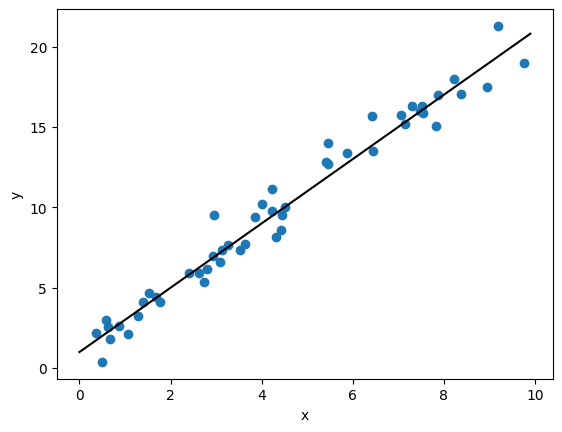

In [37]:
x = np.arange(0, 10, 0.1)
y = 2 * x + 1

plt.scatter(x_train[:50], y_train[:50])
plt.plot(x, y, color='black')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [40]:
print(f'x: {x[:5]}\ny: {y[:5]}')

x: [0.  0.1 0.2 0.3 0.4]
y: [1.  1.2 1.4 1.6 1.8]


In [45]:
# 학습 데이터/테스트 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(
    x_train, y_train,
    test_size=0.2, #분할 비율
    random_state=77
)

print(x_train.shape, x_test.shape)
print(y_train.shape, train_test_split)

(128,) (32,)
(128,) <function train_test_split at 0x7df9ad4374c0>


In [47]:
model = Sequential(
    name='linear_regression_model'
)
model.add(Input(shape=(1,)))
model.add(Dense(1,#출력층 선형 뉴런 1개, 활성화 함수 사용 안함
                kernel_initializer=RandomNormal(seed=77),
                name='output_layer'))

In [49]:
model.summary()

Model: "linear_regression_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ output_layer (Dense)                 │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(optimizer=Adam(learning_rate=0.05),
              loss='mse',
              metrics=['mae']) #성능 평가 지표

In [53]:
model.fit(x_train, y_train, epochs=50, verbose=1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 139.5064 - mae: 10.2608
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 104.1580 - mae: 8.8477
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 91.7855 - mae: 8.2719   
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 66.3864 - mae: 6.9675 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46.2262 - mae: 5.7803 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33.0407 - mae: 4.8563 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.6563 - mae: 4.0822 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.3461 - mae: 3.2266 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.4249 - mae: 2.4990  
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7408 - mae: 1.8765 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4169 - mae: 1.4355 
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0993 - mae: 1.2260 
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

In [54]:
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 1.3014 - mae: 0.9355


[1.301355242729187, 0.9355104565620422]

In [55]:
x = np.array([1, 3, 5, 7, 9])
model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[ 3.401194],
       [ 7.243529],
       [11.085864],
       [14.928199],
       [18.770533]], dtype=float32)

In [56]:
weights, bias = model.layers[0].get_weights()

print(f'weight: {weights.round(2)}')
print(f'bias: {bias.round(2)}')

weight: [[1.92]]
bias: [1.48]


In [57]:
# 예제 3.6 선형 회귀(파이토치)
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import numpy as np

In [59]:
x_train = init.uniform_(torch.Tensor(200, 1), 0, 10)
y_train = 2 * x_train + 1 + init.normal_(torch.FloatTensor(200, 1))

print(x_train.shape, y_train.shape)

torch.Size([200, 1]) torch.Size([200, 1])


In [60]:
model = nn.Sequential(
    nn.Linear(1,1) #입력 특징 1개 출력 뉴런 1개
)

In [61]:
epochs = 100

loss_fn = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.05)

for i in range(epochs):
  optimizer.zero_grad() #그래디언트 초기화
  output = model(x_train) # 출력
  loss = loss_fn(output, y_train) #오차계산

  loss.backward() #역전파
  optimizer.step() #최적화 수행

  if(i+1) % 10 == 0:
    print(f'epoch: {i+1} \tloss: {loss}')

epoch: 10 	loss: 10.126936912536621
epoch: 20 	loss: 7.251997470855713
epoch: 30 	loss: 4.444737434387207
epoch: 40 	loss: 1.8850741386413574
epoch: 50 	loss: 1.0401400327682495
epoch: 60 	loss: 1.0415141582489014
epoch: 70 	loss: 0.8952244520187378
epoch: 80 	loss: 0.8307397365570068
epoch: 90 	loss: 0.8082194328308105
epoch: 100 	loss: 0.7787899971008301


In [62]:
with torch.no_grad(): #자동 미분 방지
  x_test = torch.Tensor([[3], [5], [7], [9]])
  predict = model(x_test)
  print(predict)

tensor([[ 7.2848],
        [11.0202],
        [14.7557],
        [18.4911]])


In [64]:
weights, bias = model.parameters()
print(f'weights: {weights}, bias: {bias}')

weights: Parameter containing:
tensor([[1.8677]], requires_grad=True), bias: Parameter containing:
tensor([1.6816], requires_grad=True)


In [65]:
# 예제 3.7 로지스틱 회귀

import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [66]:
x_train = np.array([[1, 1, 0], [1, 0, 0], [0, 0, 1], [0, 1, 1]])   # 학습 데이터
y_train = np.array([[0], [0], [1], [1]])                           # 레이블

In [68]:
model = Sequential([
    Input(shape=(3, )),
    Dense(1,
          activation='sigmoid',
          kernel_initializer=RandomNormal(seed=77))
])

model.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy')
history = model.fit(x_train, y_train, epochs=30, verbose=1)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.6787
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6328
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.5854
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.5428
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.5032
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4651
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.4293
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3964
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3664
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3384
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3123
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2882
Epoch 13/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2661
Epoch 14/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2461
Epoch 15/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2278
Epoch 16/30
1/1 ━━━━━━━━━━━━━━━━━━━━

In [79]:
print(history)
print(history.epoch[:5])
print(history.history)
print(history.history['loss'])
#print(history.history['accuracy']) #compile 시 metrics 설정 안하면 loss만 나온다

[0, 1, 2, 3, 4]
{'loss': [0.6787499189376831, 0.6328213214874268, 0.5853921175003052, 0.5428125858306885, 0.5032314658164978, 0.46509474515914917, 0.42927563190460205, 0.39644622802734375, 0.36638015508651733, 0.33843255043029785, 0.3123302757740021, 0.28819265961647034, 0.2661476731300354, 0.2461164891719818, 0.22784662246704102, 0.21107982099056244, 0.19566869735717773, 0.18156030774116516, 0.16871891915798187, 0.1570710986852646, 0.14649969339370728, 0.13687190413475037, 0.12807168066501617, 0.12001455575227737, 0.11264220625162125, 0.10590793192386627, 0.09976434707641602, 0.09415850043296814, 0.0890340507030487, 0.08433657884597778]}
[0.6787499189376831, 0.6328213214874268, 0.5853921175003052, 0.5428125858306885, 0.5032314658164978, 0.46509474515914917, 0.42927563190460205, 0.39644622802734375, 0.36638015508651733, 0.33843255043029785, 0.3123302757740021, 0.28819265961647034, 0.2661476731300354, 0.2461164891719818, 0.22784662246704102, 0.21107982099056244, 0.19566869735717773, 0.1

KeyError: 'accuracy'

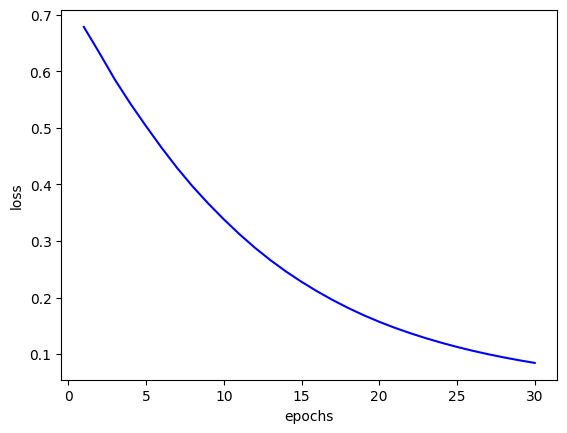

In [69]:
epochs = range(1, len(history.history['loss'])+1)

plt.plot(epochs, history.history['loss'], color='blue')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.show()

In [80]:
x_test = np.array([[1, 1, 0], [1, 0, 0], [0, 0, 1], [0, 1, 1]])  # 테스트 데이터
y_test = np.array([[0], [0], [1], [1]])   # 테스트 정답

model.predict(x_test).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


array([[0.07],
       [0.08],
       [0.92],
       [0.92]], dtype=float32)

In [81]:
weights, bias = model.layers[0].get_weights()

print(f'weight: {weights.round(2)}')
print(f'bias: {bias.round(2)}')

weight: [[-2.49]
 [-0.02]
 [ 2.48]]
bias: [-0.01]
